In [1]:
import pandas as pd
from IPython.display import display

In [2]:
ion=pd.read_csv('D:/abhipraja/codes/dataset/DLcourse/ion.csv',index_col=0)
display(ion.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [3]:
df=ion.copy()
df['Class']=df['Class'].map({'good':0,'bad':1})

In [4]:
dftrain=df.sample(frac=.7,random_state=0)
dfvalid=df.drop(dftrain.index)
max_=dftrain.max(axis=0)
min_=dftrain.min(axis=0)

In [5]:
dftrain=(dftrain-min_)/(max_-min_)
dfvalid=(dfvalid-min_)/(max_-min_)
dftrain.dropna(axis=1,inplace=True)
dfvalid.dropna(axis=1,inplace=True)

xtrain=dftrain.drop('Class',axis=1)
xvalid=dfvalid.drop('Class',axis=1)
ytrain=dftrain['Class']
yvalid=dfvalid['Class']

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
model=keras.Sequential([
    layers.Dense(4,activation='relu',input_shape=[33]),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [11]:
early_stopping=keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=.001,
    restore_best_weights=True,
)

In [12]:
history=model.fit(
    xtrain,ytrain,
    validation_data=(xvalid,yvalid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

<AxesSubplot:>

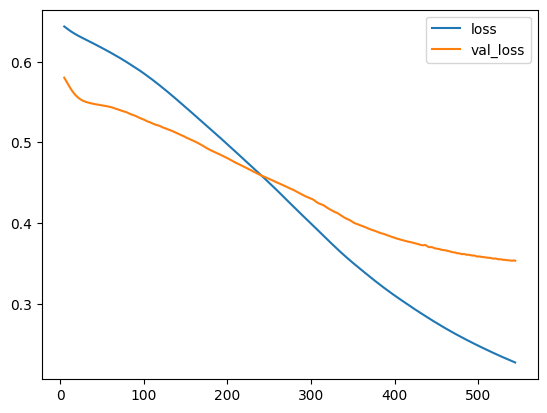

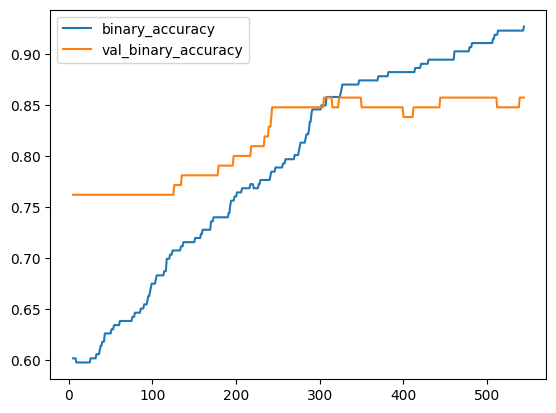

In [14]:
historydf=pd.DataFrame(history.history)
historydf.loc[5:,['loss','val_loss']].plot()
historydf.loc[5:,['binary_accuracy','val_binary_accuracy']].plot()

In [15]:
print(("Best Validation Loss: {:0.4f}" +\
    "\nBest Validation Accuracy: {:0.4f}")\
    .format(historydf['val_loss'].min(),
        historydf['val_binary_accuracy'].max()))

Best Validation Loss: 0.3535
Best Validation Accuracy: 0.8571
